In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the two CSVs into DataFrames
df1 = pd.read_csv('test.csv',header=None, names=['sentence'])
df2 = pd.read_csv('train.csv',header=None, names=['sentence'])
print(df1.info(), df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65625 entries, 0 to 65624
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  65625 non-null  object
dtypes: object(1)
memory usage: 512.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52499 entries, 0 to 52498
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  52499 non-null  object
dtypes: object(1)
memory usage: 410.3+ KB
None None


In [10]:
import pandas as pd

# Assuming df1 and df2 are your DataFrames
diff_df1_df2 = df1[~df1['sentence'].isin(df2['sentence'])]
diff_df2_df1 = df2[~df2['sentence'].isin(df1['sentence'])]

print("Rows in df1 but not in df2:")
print(diff_df1_df2)

print("\nRows in df2 but not in df1:")
print(diff_df2_df1)


Rows in df1 but not in df2:
                                                sentence
52500  [('``', '.'), ('E', 'NOUN'), ("''", '.'), ('st...
52501  [('He', 'PRON'), ('hoped', 'VERB'), ('they', '...
52502  [('To', 'PRT'), ('determine', 'VERB'), ('the',...
52503  [('By', 'ADP'), ('both', 'DET'), ('standards',...
52504  [('Mr.', 'PROPN'), ('Sonnett', 'PROPN'), ('sai...
...                                                  ...
65620  [('Thus', 'ADV'), (',', '.'), ('paradoxically'...
65621  [('Someone', 'NOUN'), ('reasonably', 'ADV'), (...
65622  [('During', 'ADP'), ('this', 'DET'), ('search'...
65623  [('Thank', 'VERB'), ('you', 'PRON'), ('for', '...
65624  [("Today's", 'NOUN'), ('earthquakes', 'NOUN'),...

[12637 rows x 1 columns]

Rows in df2 but not in df1:
Empty DataFrame
Columns: [sentence]
Index: []


Length of df1: 63760
Length of df2: 51134
Length of df1 after dropping duplicates: 63760
Length of df2 after dropping duplicates: 51134
Unique to df1: 12626
Unique to df2: 0
Common rows: 51134


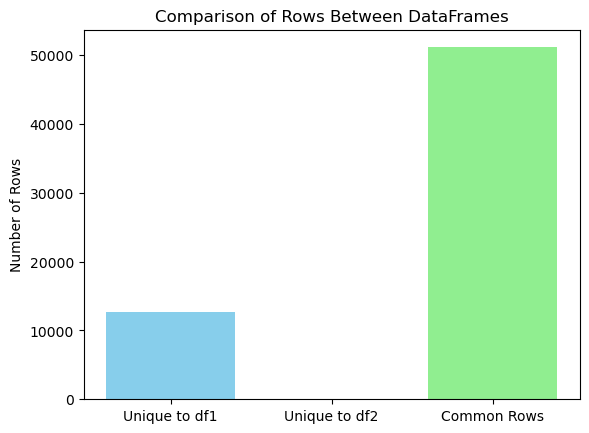

In [14]:
# Drop Duplicates
print("Length of df1:", len(df1))
print("Length of df2:", len(df2))
df1 = df1.drop_duplicates(subset=['sentence'])
df2 = df2.drop_duplicates(subset=['sentence'])
print("Length of df1 after dropping duplicates:", len(df1))
print("Length of df2 after dropping duplicates:", len(df2))

unique_to_df1 = df1[~df1['sentence'].isin(df2['sentence'])]
unique_to_df2 = df2[~df2['sentence'].isin(df1['sentence'])]
common_rows = pd.merge(df1, df2, on='sentence')

# Create counts for visualization
counts = {
    'Unique to df1': len(unique_to_df1),
    'Unique to df2': len(unique_to_df2),
    'Common Rows': len(common_rows)
}
print("Unique to df1:", len(unique_to_df1))
print("Unique to df2:", len(unique_to_df2))
print("Common rows:", len(common_rows))

# Plotting
plt.bar(counts.keys(), counts.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Comparison of Rows Between DataFrames")
plt.ylabel("Number of Rows")
plt.show()